In [1]:
import matplotlib.pyplot as plt
import astropy.units as u

from gw_signal_tools.waveform import get_wf_generator, time_phase_wrapper
from gw_signal_tools.fisher import FisherMatrix, FisherMatrixNetwork

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


In [2]:
import lalsimulation.gwsignal.core.parameter_conventions as pc

# Make sure mass1 and mass2 are not in default_dict (makes messy behaviour)
pc.default_dict.pop('mass1', None)
pc.default_dict.pop('mass2', None);

In [3]:
from gw_signal_tools import PLOT_STYLE_SHEET

plt.style.use(PLOT_STYLE_SHEET)

In [4]:
f_min = 20.0 * u.Hz
f_max = 1024.0 * u.Hz
delta_f = 2**-8 * u.Hz
delta_t = 1.0 / 4096.0 * u.s
f_ref = f_min  # Frequency where we specify spins


wf_params = {
    'total_mass': 50.0 * u.Msun,
    'mass_ratio': 0.5 * u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'deltaF': delta_f,
    'f22_ref': f_ref,
    'phi_ref': 0.0 * u.rad,
    'distance': 440.0 * u.Mpc,
    'inclination': 0.0 * u.rad,
    'time': 0.0 * u.s,
    'phase': 0.0 * u.rad,
    'condition': 1,
}

In [5]:
approximant = 'IMRPhenomXPHM'
wf_gen = time_phase_wrapper(get_wf_generator(approximant))

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [6]:
from gw_signal_tools.PSDs import psd_sim

fisher = FisherMatrix(
    point=wf_params,
    params_to_vary=['total_mass', 'mass_ratio', 'distance', 'time', 'phase'],
    wf_generator=wf_gen,
    psd=psd_sim[1:],  # First entry is NaN
    f_range=[f_min, f_max],
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

So let us first have a look at the matrix.

In [7]:
print(fisher)

FisherMatrix([[ 3.67874416e+04,  4.72982656e+05,
               -1.58565079e-01,  8.19627184e+06,
               -1.27902606e+04],
              [ 4.72982656e+05,  6.12500502e+06,
               -5.53391049e+00,  1.00351648e+08,
               -1.66727994e+05],
              [-1.58565079e-01, -5.53391049e+00,
                2.44334902e-02,  1.25547264e-15,
               -1.82646627e-18],
              [ 8.19627184e+06,  1.00351648e+08,
                1.25547264e-15,  2.55172943e+09,
               -2.67447218e+06],
              [-1.27902606e+04, -1.66727994e+05,
               -1.82646627e-18, -2.67447218e+06,
                4.73032371e+03]]
             unit: [[Unit("1 / solMass2") Unit("1 / solMass")
  Unit("1e-06 / (pc solMass)") Unit("1 / (s solMass)")
  Unit("1 / (rad solMass)")]
 [Unit("1 / solMass") Unit(dimensionless) Unit("1e-06 / pc")
  Unit("1 / s") Unit("1 / rad")]
 [Unit("1e-06 / (pc solMass)") Unit("1e-06 / pc")
  Unit("1e-12 / pc2") Unit("1e-06 / (pc s)")
  Unit("1e

In this representation, it is hard to keep track of indices. Let us use the built-in `plot_matrix` function for a plot that enables this.

In [8]:
from gw_signal_tools.units import gw_signal_tools_units

display_units = gw_signal_tools_units
display_units.bases.remove(u.pc)
display_units.bases |= {u.Mpc}

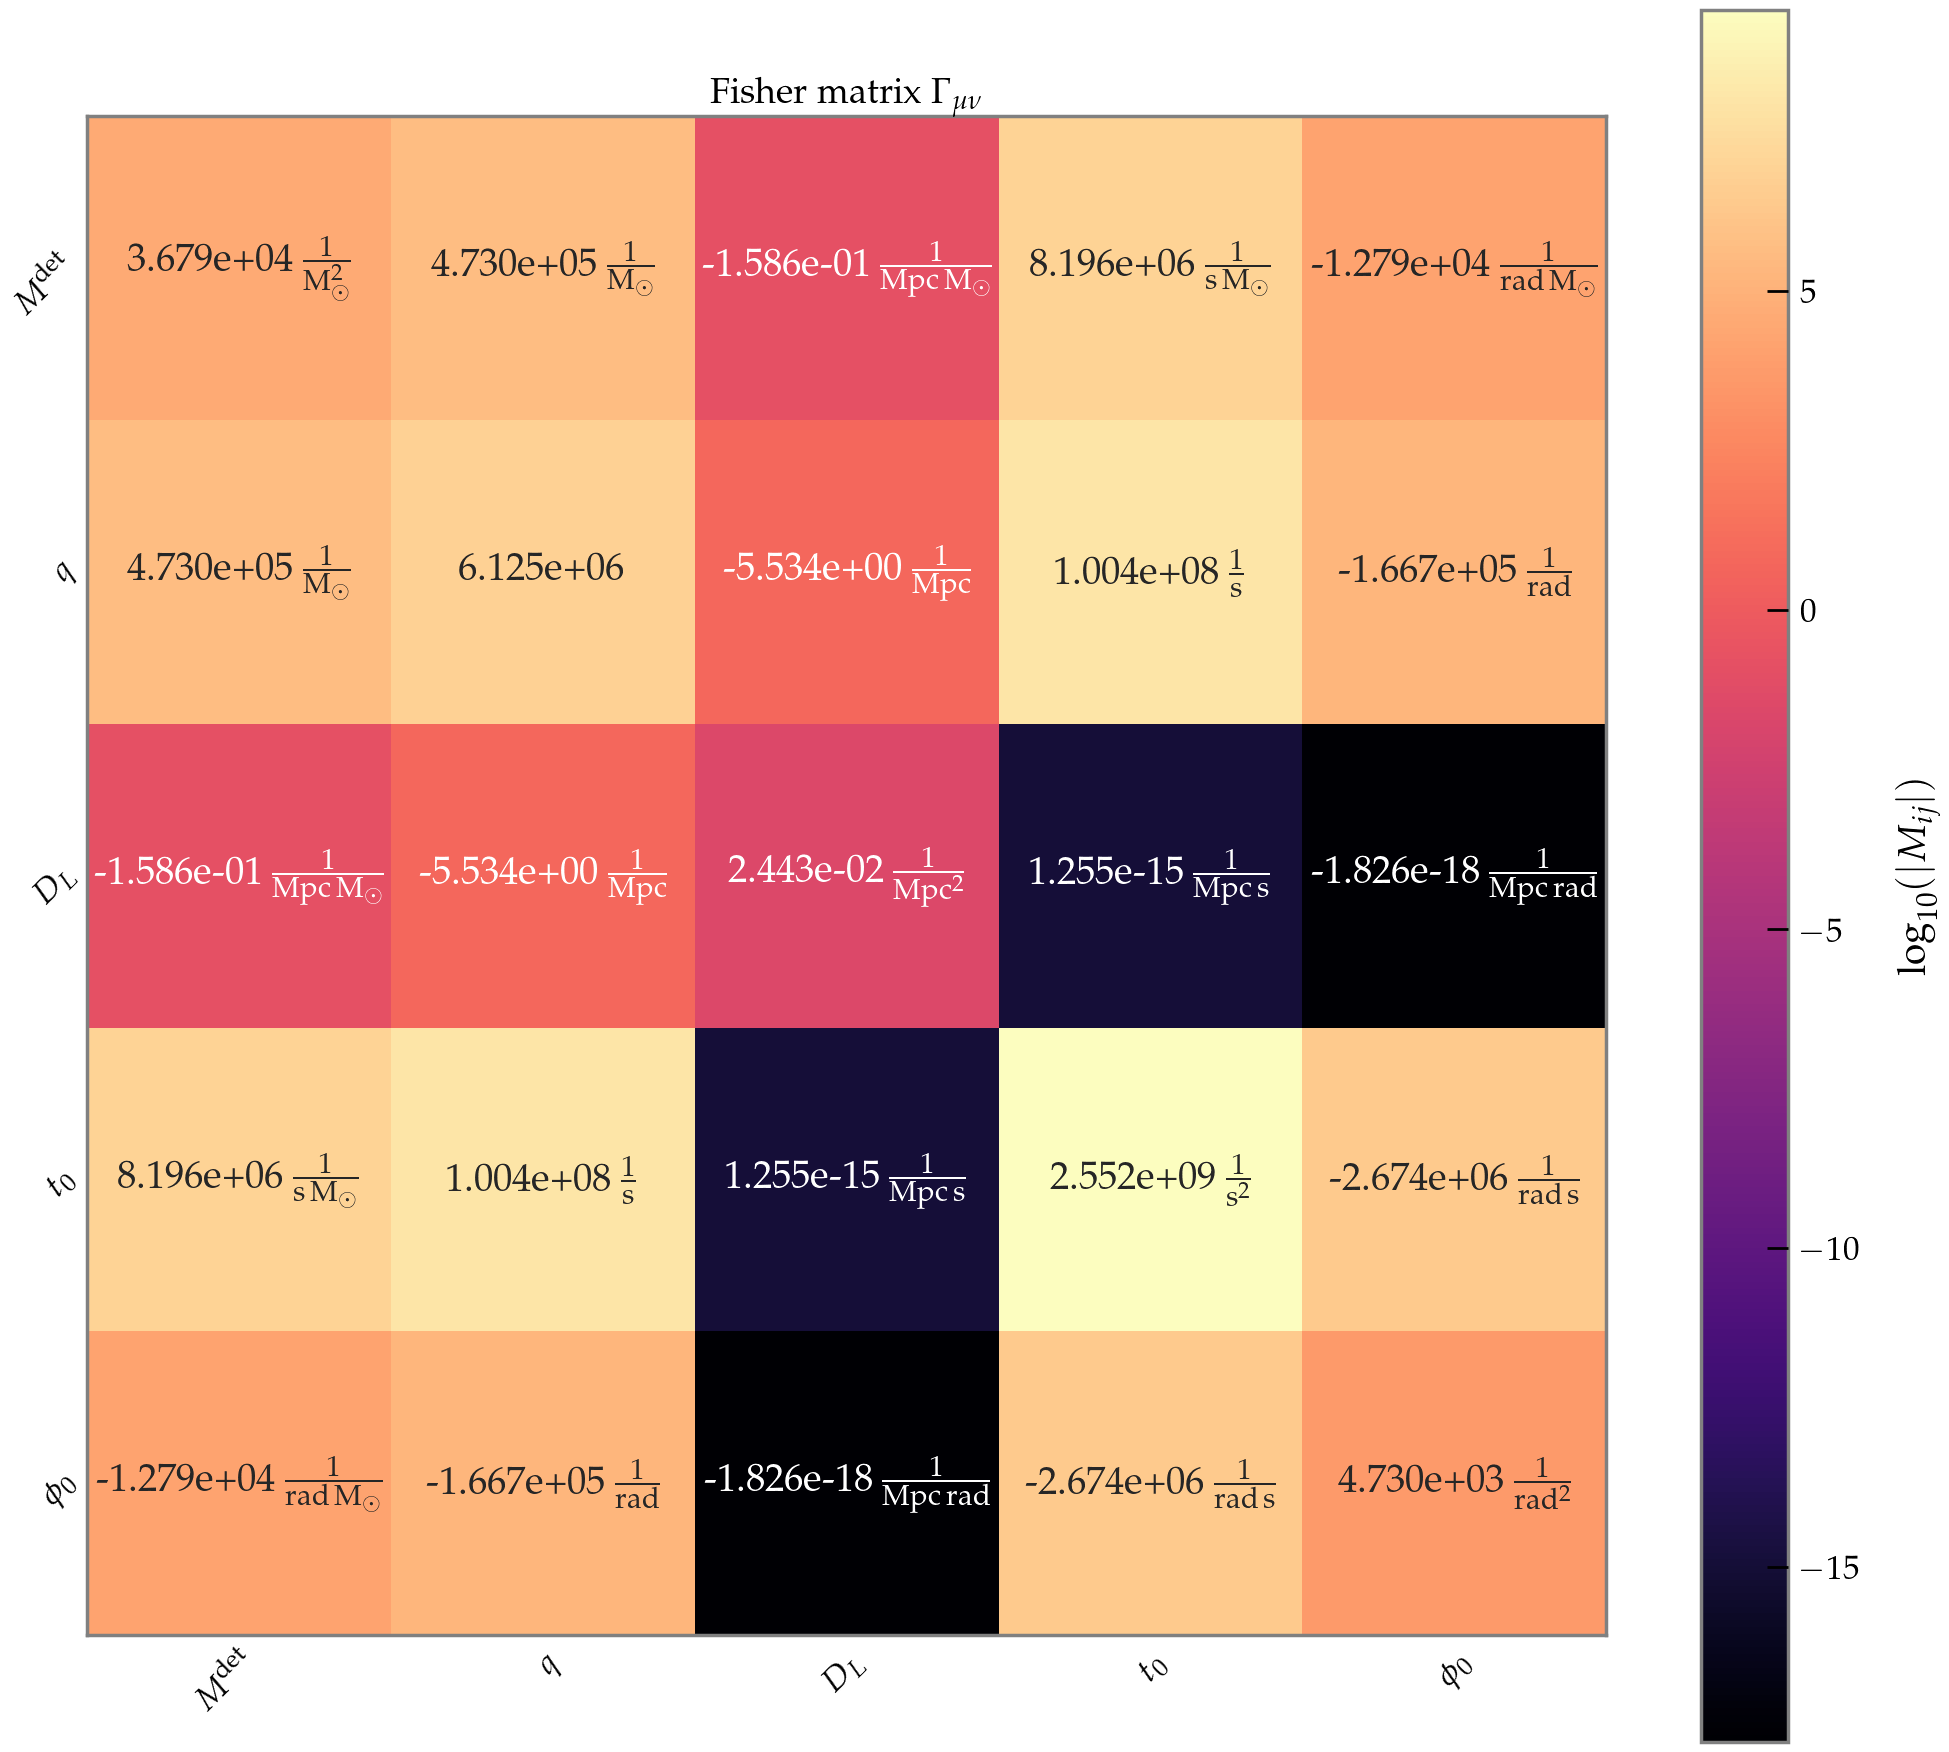

In [9]:
# fisher.plot()

# fig, ax = plt.subplots(figsize=(21, 20))
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, fisher.nparams * 4.5))

ax = fisher.plot_matrix(fisher.fisher.decompose(display_units.bases), ax=ax)

ax.set_title(r'Fisher matrix $\Gamma_{\mu \nu}$')

plt.show()

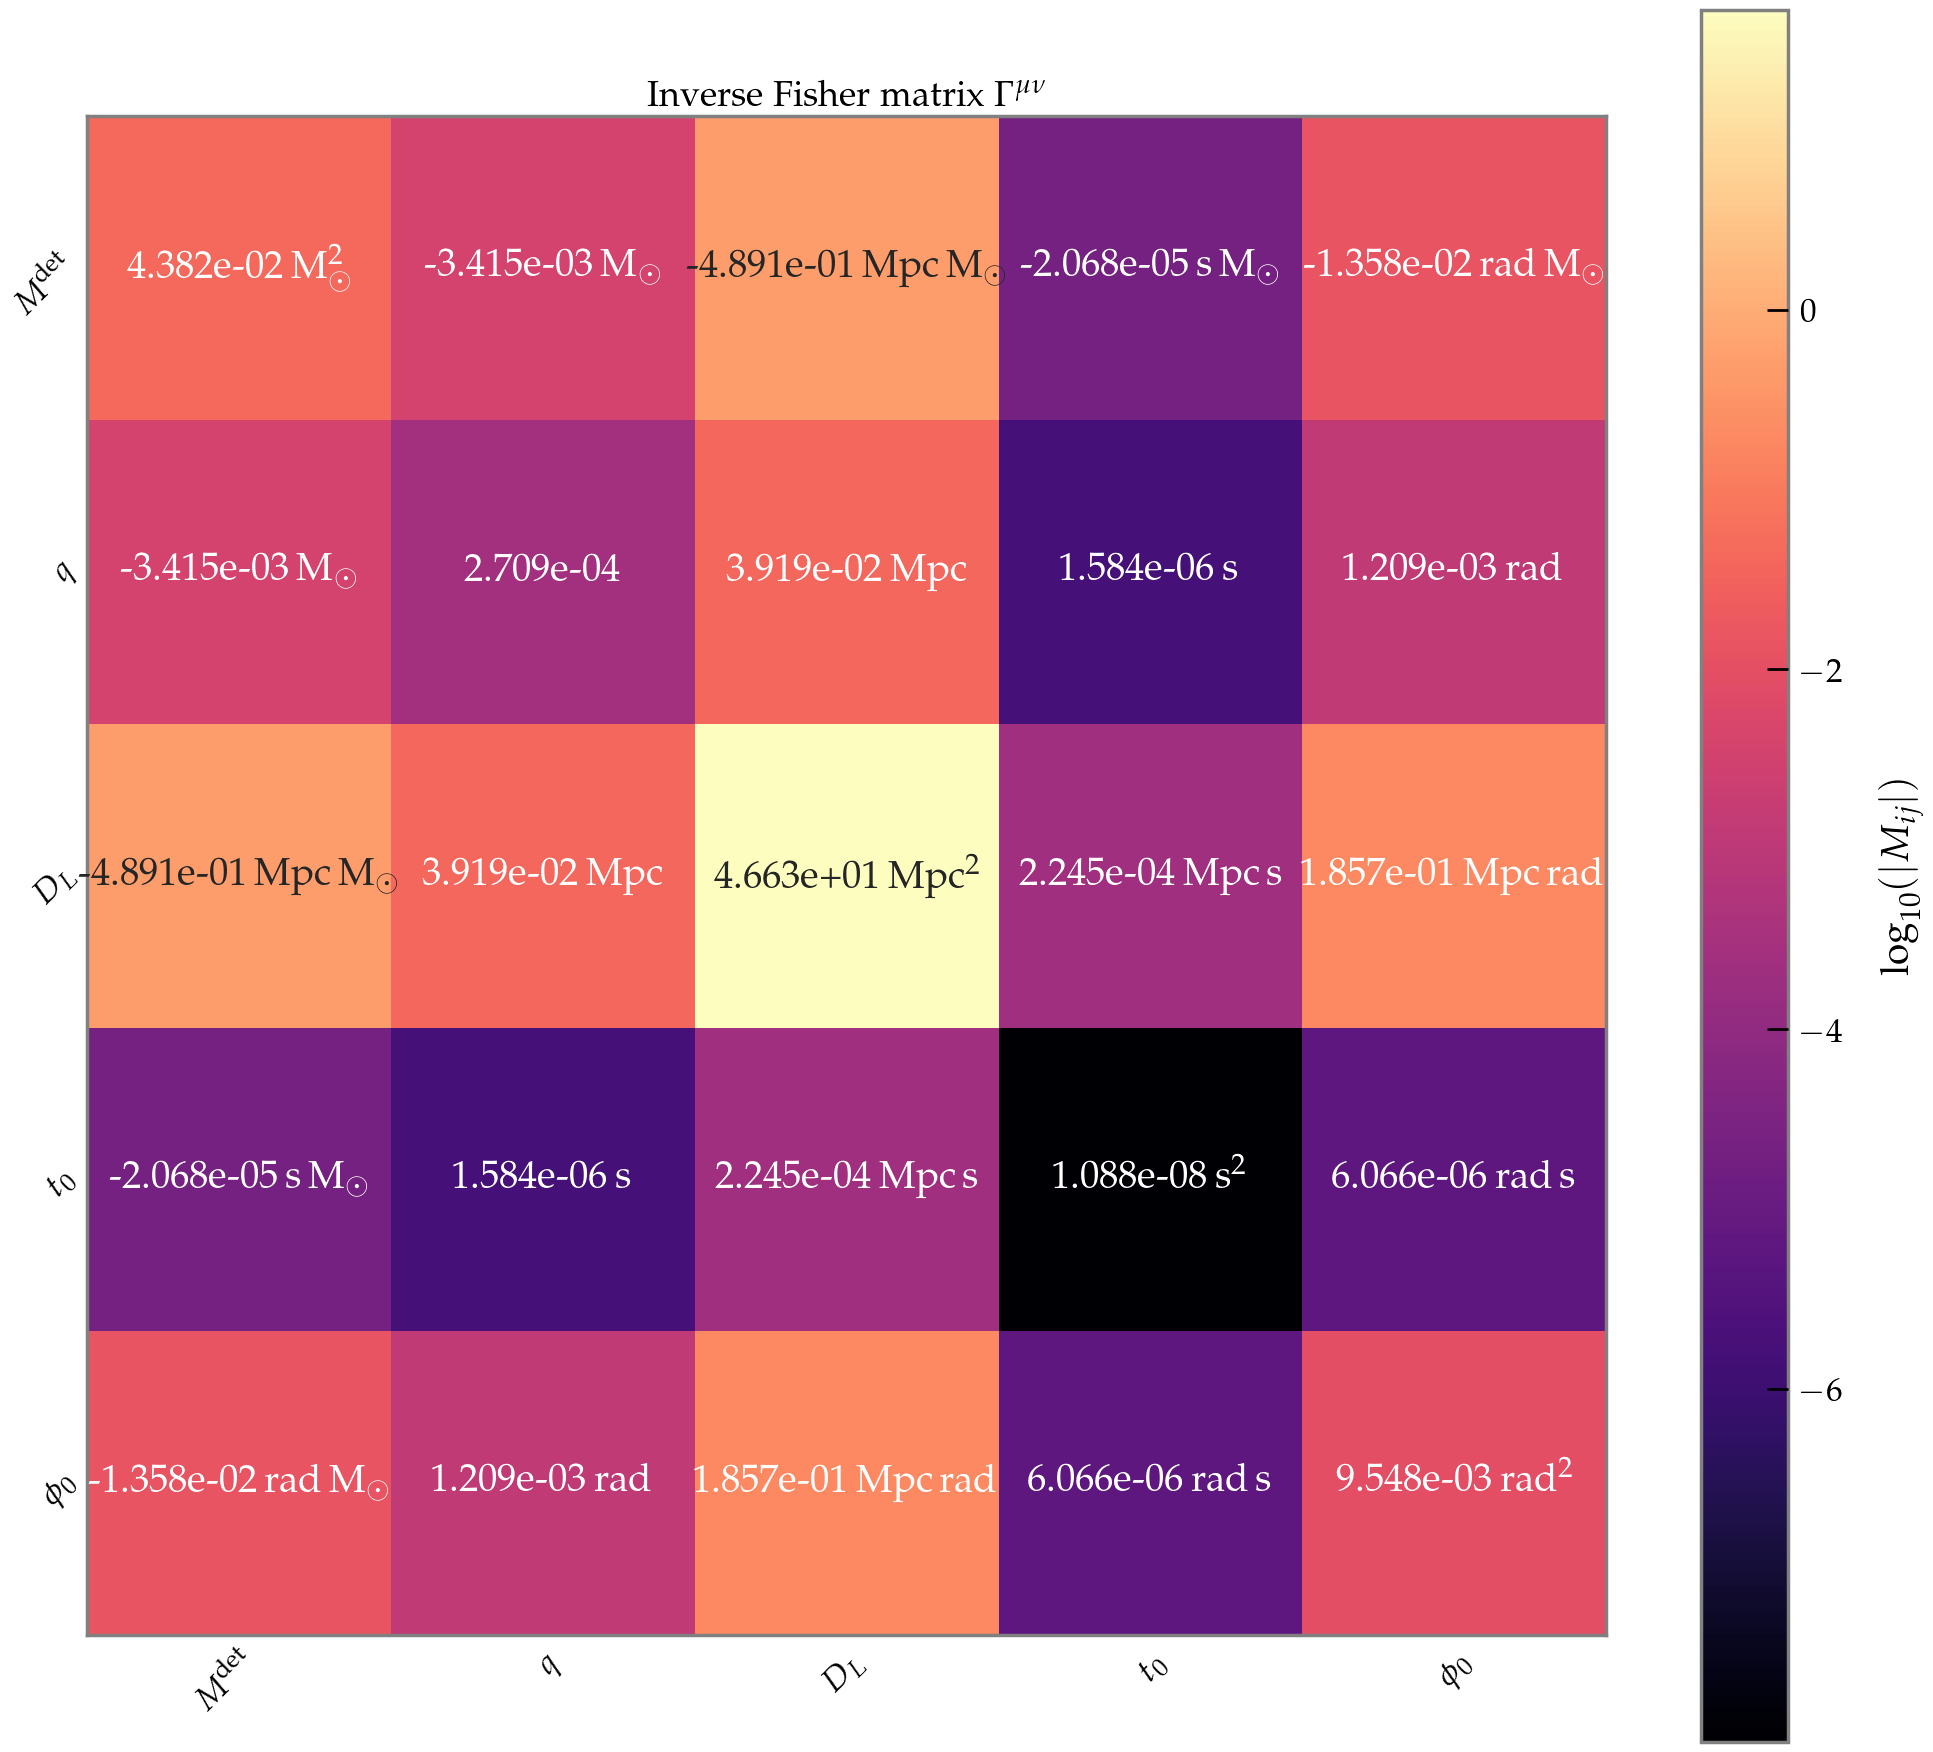

In [10]:
# fisher.plot()

# fig, ax = plt.subplots(figsize=(21, 20))
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, fisher.nparams * 4.5))

ax = fisher.plot_matrix(fisher.fisher_inverse.decompose(display_units.bases), ax=ax)

ax.set_title(r'Inverse Fisher matrix $\Gamma^{\mu \nu}$')

plt.show()

A common issue with Fisher matrices is their condition number. So, how high is it for this particular one?

In [11]:
print(f'{fisher.cond() = :e}')

fisher._check_cond()  # To demonstrate no message is printed

fisher.cond() = 1.191863e+11


Not too concerning. Otherwise, a warning would be printed.

Lastly, a quick technical ***note:***
``FisherMatrix`` instances are immutable, i.e. setting properties in the following way does not work:

In [12]:
fisher.point = wf_params | {'total_mass': 42 * u.Msun}

AttributeError: property 'point' of 'FisherMatrix' object has no setter

Instead, please use the `update_attrs` function:

In [13]:
new_fisher = fisher.update_attrs(
    new_point=wf_params | {'total_mass': 42 * u.Msun},
    direct_computation=False,  # Avoid actual computation, this is just demonstration
)

print(new_fisher.point)

{'total_mass': <Quantity 42. solMass>, 'mass_ratio': <Quantity 0.5>, 'f22_start': <Quantity 20. Hz>, 'f_max': <Quantity 1024. Hz>, 'deltaF': <Quantity 0.00390625 Hz>, 'f22_ref': <Quantity 20. Hz>, 'phi_ref': <Quantity 0. rad>, 'distance': <Quantity 440. Mpc>, 'inclination': <Quantity 0. rad>, 'time': <Quantity 0. s>, 'phase': <Quantity 0. rad>, 'condition': 1}


## Statistical, Systematic Bias

In [14]:
from gwpy.timeseries import TimeSeries
import numpy as np

np.random.seed(42)

In [15]:
noise = TimeSeries(
    np.random.normal(scale=1e-21, size=1024), sample_rate=1024, unit=u.strain
)  # 1e-21 as rough estimate of real noise
stat_bias = fisher.statistical_bias(noise)

stat_bias_avg = fisher.standard_deviation()

wf_gen_2 = time_phase_wrapper(get_wf_generator('SEOBNRv4PHM'))
sys_bias = fisher.systematic_bias(
    reference_wf_generator=wf_gen_2,
)

2025-12-30  21:42:35  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:42:35  INFO (inner_product.py: 99): Given upper bound of 1024.0 1 / s is larger than values available from given signals. Taking an upper bound of 512.0 1 / s instead.
2025-12-30  21:42:35  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:42:35  INFO (inner_product.py: 99): Given upper bound of 1024.0 1 / s is larger than values available from given signals. Taking an upper bound of 512.0 1 / s instead.
2025-12-30  21:42:35  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of

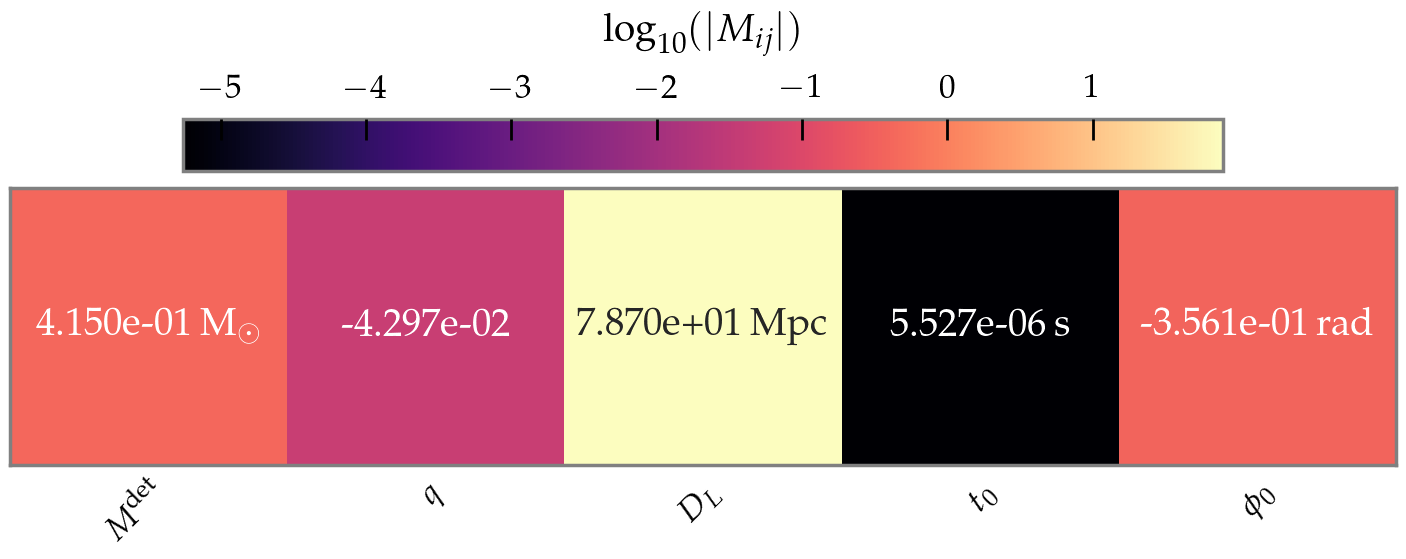

In [16]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher.plot_matrix(
    stat_bias.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()

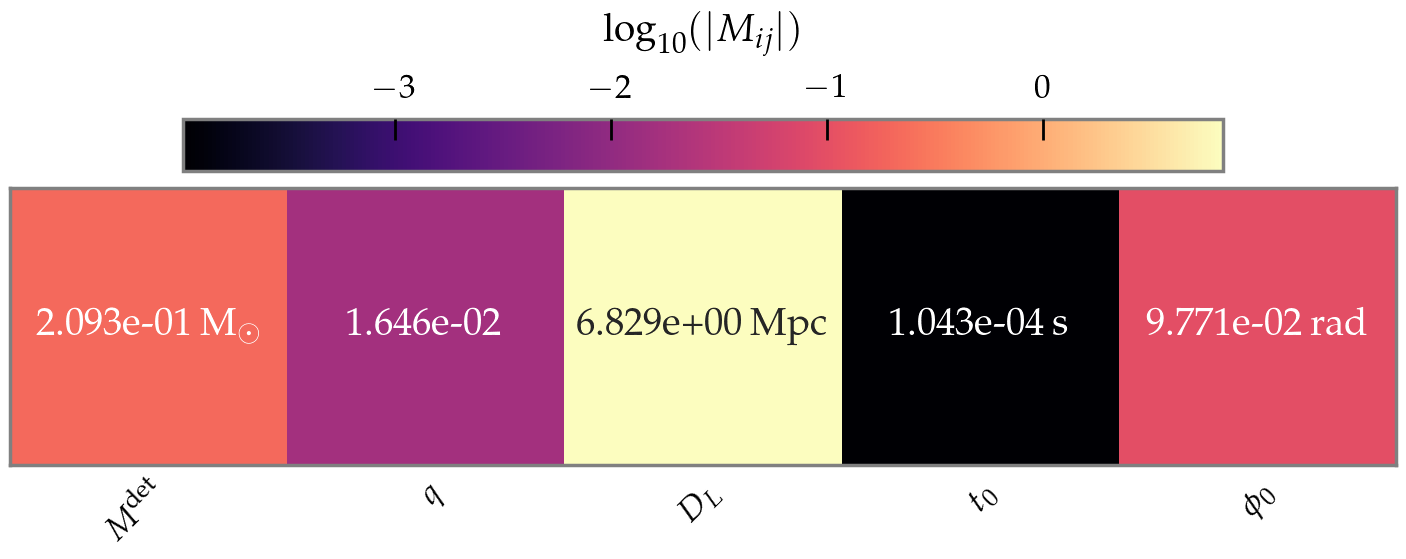

In [17]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher.plot_matrix(
    stat_bias_avg.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()

Are these numbers reasonable? Let us check the SNR for this signal

In [18]:
fisher.snr()

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

<Quantity 68.77734882>

This is pretty high. Moreover, we do not include the entire parameter in the Fisher matrix above, which means we neglect some of the correlations in it (clearly has an impact on the parameter variances, too).

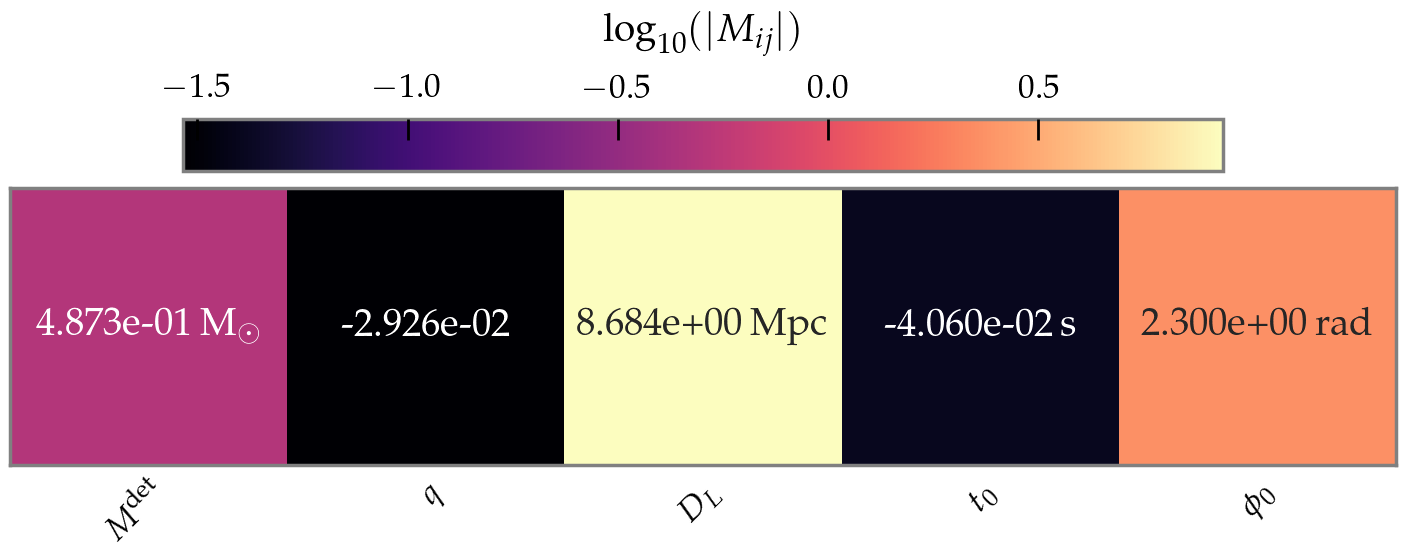

In [19]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher.plot_matrix(
    sys_bias.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()

## Marginalization

If you want to know what the marginalized 1D variance of the total mass is, but have trouble inverting the Fisher matrix for a given set of parameters (e.g., due to correlations), the following trick is supremely useful.
There is a mathematical way to marginalize over parameters and we have implemented it in the function `FisherMatrix.project_fisher`.
Therefore, by projecting out all parameters except for the total mass and then inverting the resulting matrix, we can obtain the 1D variance as well -- but without having to worry about (there is no strict need to project out *all* parameters except the total mass; doing this only for a selected set of parameters works as well).

In [20]:
fisher_projected = fisher.project_fisher(
    params=['mass_ratio', 'distance', 'time', 'phase'],
)  # Marginalize over everything but total_mass

fisher_projected_2 = fisher.project_fisher(
    params=['mass_ratio', 'distance'],
)  # Marginalize over subset of parameters

In [21]:
ind_M = fisher.params_to_vary.index('total_mass')

print(fisher.covariance_matrix[ind_M, ind_M])
print(fisher_projected.covariance_matrix[ind_M, ind_M])
print(fisher_projected_2.covariance_matrix[ind_M, ind_M])

0.04382116640101232 solMass2
0.04382116640124495 solMass2
0.04382116640099546 solMass2


Note that all of the results are basically perfectly equal here because we do not actually have problems with the condition number here.
But in principle, this method would work even if the full Fisher matrix had a huge condition number (since by definition, 1-by-1 matrices aka scalars have a condition number of $1$).

## Network

We need detectors here, not single PSD

In [22]:
from gw_signal_tools.PSDs import psd_o3_h1, psd_o3_l1, psd_o3_v1
from gw_signal_tools.types import Detector

l1 = Detector('L1', psd_o3_l1)
h1 = Detector('H1', psd_o3_h1)
v1 = Detector('V1', psd_o3_v1)

network_noise = dict(
    # 1e-21 as rough estimate of real noise
    L1=TimeSeries(
        np.random.normal(scale=1e-21, size=1024), sample_rate=1024, unit=u.strain
    ),
    H1=TimeSeries(
        np.random.normal(scale=1e-21, size=1024), sample_rate=1024, unit=u.strain
    ),
    V1=TimeSeries(
        np.random.normal(scale=1e-21, size=1024), sample_rate=1024, unit=u.strain
    ),
)

Also need detector strain, i.e. extrinsic parameters

In [23]:
wf_params_ext = wf_params | {
    'ra': 0.1 * u.rad,
    'dec': 0.2 * u.rad,
    'psi': 0.5 * u.rad,
    'tgps': 1126259462,
}

In [24]:
fisher_network = FisherMatrixNetwork(
    point=wf_params_ext,
    params_to_vary=['total_mass', 'mass_ratio', 'distance', 'time', 'phase'],
    wf_generator=wf_gen,
    detectors=[h1, l1, v1],
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

In [25]:
print(f'{fisher_network.cond() = :e}')

fisher_network._check_cond()  # To demonstrate no message is printed

fisher_network.cond() = 1.856596e+11


Also fine, just slightly more than before (likely due to inclusion of extrinsic parameters).

In [26]:
stat_bias_network = fisher_network.statistical_bias(network_noise)

stat_bias_avg_network = fisher_network.standard_deviation()

wf_gen_2 = time_phase_wrapper(get_wf_generator('SEOBNRv4PHM'))
sys_bias_network = fisher_network.systematic_bias(
    reference_wf_generator=wf_gen_2,
)

2025-12-30  21:43:12  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:43:12  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:43:12  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:43:12  INFO (inner_product.py: 257): `signal1` is a ``TimeSeries``, performing an automatic FFT. Due to potential issues with conventions and resolution of the result, this is discouraged, consider doing it manually.
2025-12-30  21:43:12  INFO (inner_product.py: 257): `signal1` is a ``Tim

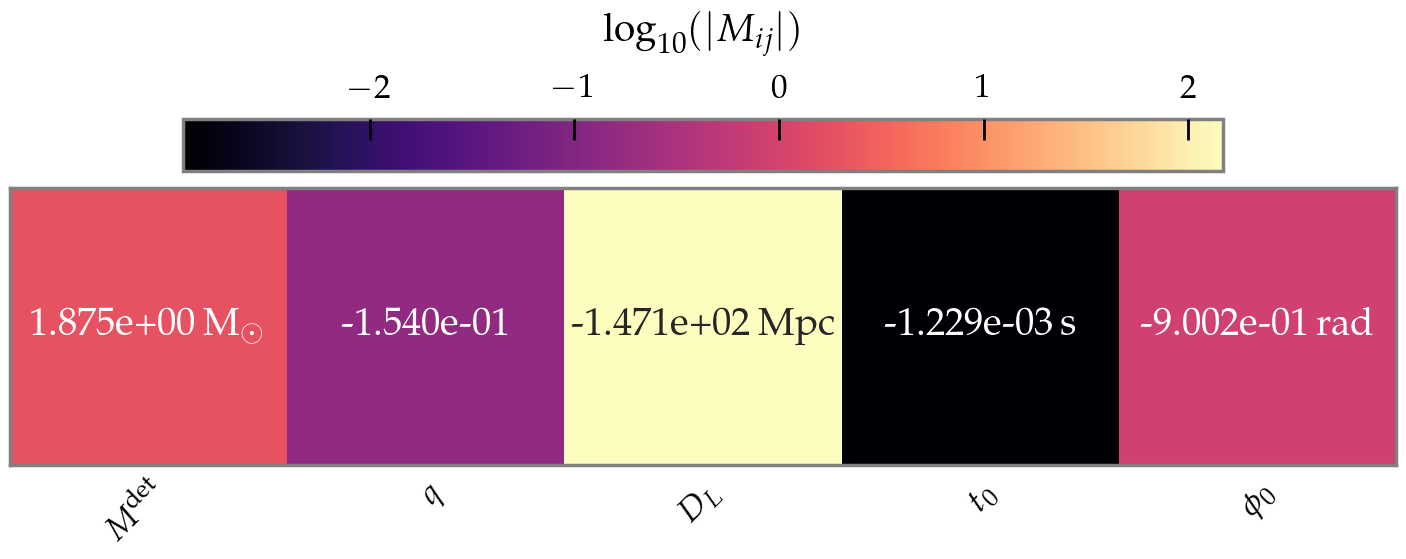

In [27]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher_network.plot_matrix(
    stat_bias_network.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()

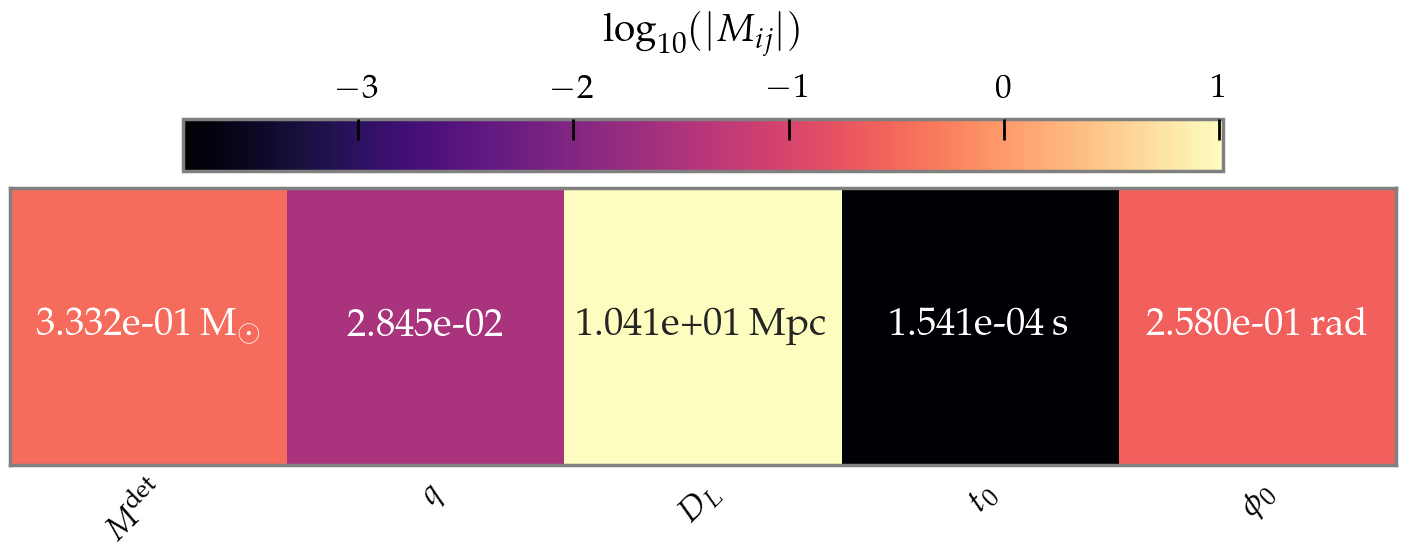

In [28]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher_network.plot_matrix(
    stat_bias_avg_network.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()

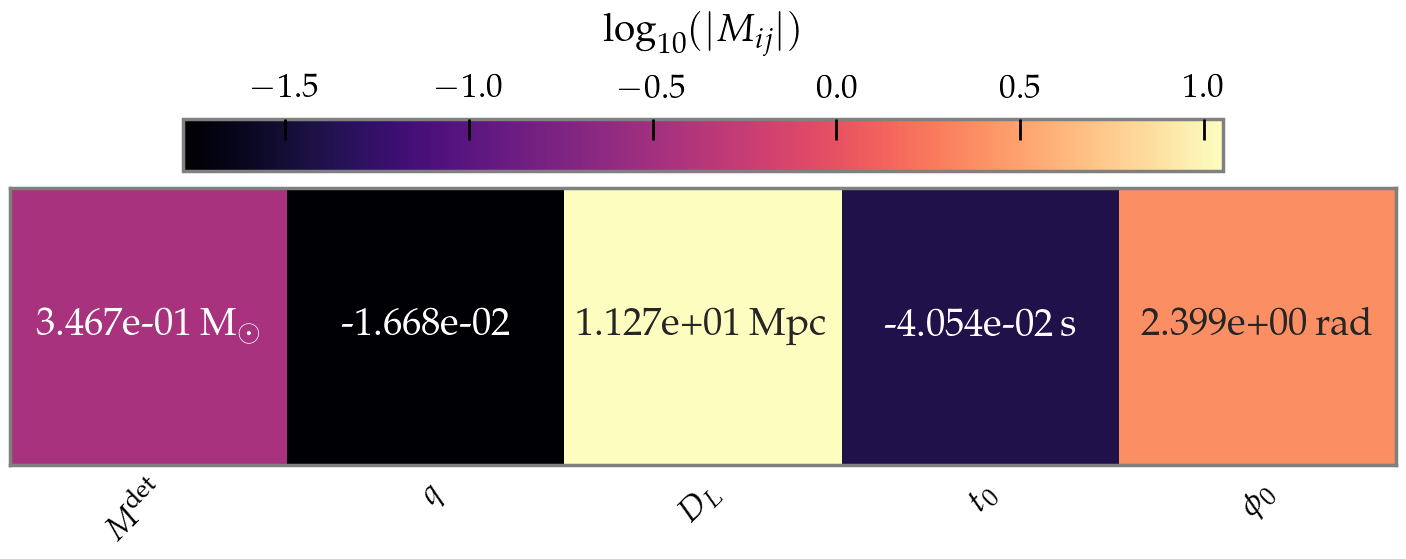

In [29]:
fig, ax = plt.subplots(figsize=(fisher.nparams * 4.5 + 2, 4.5))

fisher_network.plot_matrix(
    sys_bias_network.decompose(display_units.bases).to_row(),
    ax=ax,
    yticks=False,
)

plt.show()